# EDA of simulation results

In [1]:
import numpy as np
import pandas as pd
from emcee import autocorr

## Look at one output file

In [3]:
N = "3"
T = "04"
L = "16"
G = "05"

In [ ]:
# filenameA = f"../../lattice/improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/N{N}L{L}M1C{G}0T{T}-masa.txt"
# filenameB = f"../../lattice/improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/N{N}L{L}M1C{G}0T{T}-1.txt"

In [4]:
filename = f"../../lattice/improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/data.h5"

In [5]:
import os 
assert os.path.isfile(filename)
# assert os.path.isfile(filenameA)
# assert os.path.isfile(filenameB)


In [6]:
print(filename)

../../lattice/improv_runs/bmn2_su3_g05/l16/t04/data.h5


The output files (`.txt`) have a header that needs to be removed. The log files (`log`) correspond only to the final run and do not have a header.

In [5]:
#data = pd.read_csv(filenameA, sep='\s+', skiprows=7, names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)
#data_new = pd.read_csv(filenameB, sep='\s+', skiprows=7, names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)

Instead the `h5` files are already perfectly arranged to be read by `pandas` giving the key `mcmc_obs`

In [7]:
data_new = pd.read_hdf(filename, "mcmc_obs")

In [8]:
data_new.head()

,dH,e,p,x2,f2,ub,acc,nmat,ntau,xdtau,udtau,temperature,mass,coupling,mdtu
tj,,,,,,,,,,,,,,,
100,0.596197,0.802775,0.390494,0.604420,0.528948,3.552714e-15,0.8900,3,20,0.025,0.025,0.4,1.0,0.5,50.0
200,-0.138797,1.476696,0.703736,0.974021,1.340466,2.664535e-15,0.8700,3,20,0.025,0.025,0.4,1.0,0.5,100.0
300,0.527290,1.069457,0.281698,0.763696,0.815362,4.440892e-16,0.8600,3,20,0.025,0.025,0.4,1.0,0.5,150.0
400,0.266523,0.724805,0.152394,0.570547,0.411354,3.996803e-15,0.8525,3,20,0.025,0.025,0.4,1.0,0.5,200.0
500,-0.246900,0.661890,0.210822,0.575082,0.231490,2.664535e-15,0.8540,3,20,0.025,0.025,0.4,1.0,0.5,250.0


<AxesSubplot:xlabel='mdtu'>

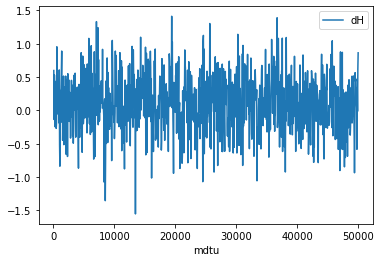

In [10]:
# data.dH.plot(), 
data_new.plot(x='mdtu',y='dH')

<AxesSubplot:xlabel='tj'>

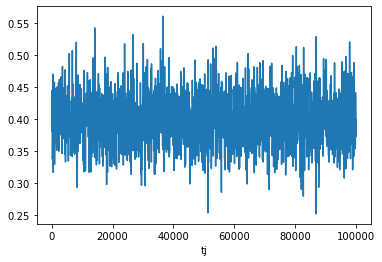

In [9]:
# data.x2.plot(), 
data_new.x2.plot()

<AxesSubplot:ylabel='Density'>

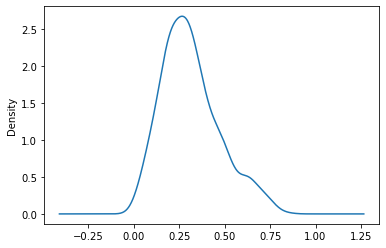

In [12]:
# data.p.plot(kind="kde"), 
data_new.p.plot(kind="kde")

<AxesSubplot:xlabel='tj'>

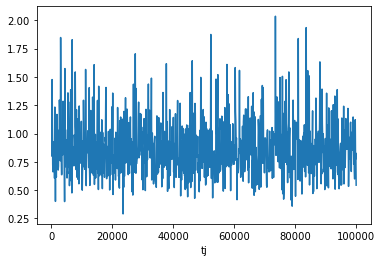

In [15]:
# data.e.plot(), 
data_new.e.plot()

<AxesSubplot:ylabel='Frequency'>

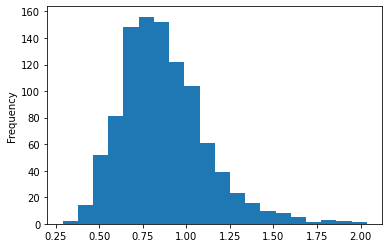

In [13]:
# data.e.plot(kind="hist", bins=20), 
data_new.e.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Density'>

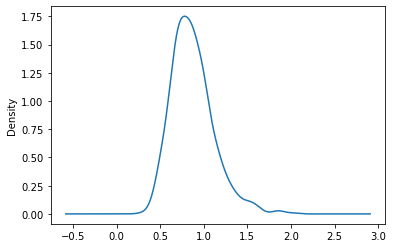

In [14]:
# data.e.plot(kind="kde"), 
data_new.e.plot(kind="kde")

<AxesSubplot:xlabel='tj'>

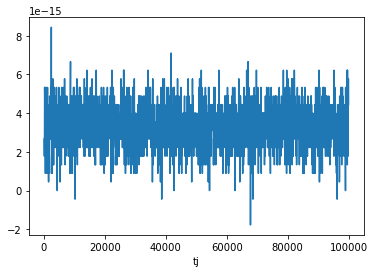

In [14]:
# data.ub.plot(), 
data_new.ub.plot()

In [15]:
tau = autocorr.integrated_time(data_new.e.values)
print(tau[0])

0.8385841731717818


In [16]:
#data.describe().T
data_new.describe().T

,count,mean,std,min,25%,50%,75%,max
dH,2000.0,7.922143e-02,3.734973e-01,-1.282990e+00,-1.586195e-01,7.986530e-02,3.256474e-01,1.280688e+00
e,2000.0,5.905436e-01,7.412637e-02,3.327446e-01,5.387832e-01,5.865016e-01,6.352303e-01,8.788281e-01
p,2000.0,2.953357e-01,1.519199e-01,4.402698e-03,1.858597e-01,2.760860e-01,3.805716e-01,8.649290e-01
x2,2000.0,3.967530e-01,3.996427e-02,2.519524e-01,3.692408e-01,3.950734e-01,4.229001e-01,5.604485e-01
f2,2000.0,1.291937e-01,2.675093e-02,5.386146e-02,1.104992e-01,1.273252e-01,1.454646e-01,2.478128e-01
ub,2000.0,3.303358e-15,1.179452e-15,-1.776357e-15,2.664535e-15,3.108624e-15,3.996803e-15,8.437695e-15
acc,2000.0,8.599369e-01,3.158815e-03,8.400000e-01,8.586724e-01,8.597767e-01,8.604319e-01,9.200000e-01
nmat,2000.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
ntau,2000.0,1.600000e+01,0.000000e+00,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01
xdtau,2000.0,6.250000e-02,0.000000e+00,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02


In [11]:
data_new.dtypes

dH             float64
e              float64
p              float64
x2             float64
f2             float64
ub             float64
acc            float64
nmat             int64
ntau             int64
xdtau          float64
udtau          float64
temperature    float64
mass           float64
coupling       float64
mdtu           float64
dtype: object

In [17]:
np.mean(data_new.e * float(N)**2)

5.314891984818244

# Extract $E$

Use the `h5` file which contains the entire MCMC run

In [ ]:
Ts = ["04", "035", "03", "025", "02", "015", "01", "005", "0025"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 1000  # thermalization cut in units of MDTU
N = 3
G = "05"
for L in Ls:
    for T in Ts:
        filename = f"../../lattice/improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/data.h5"
        try:
            data = pd.read_hdf(filename, "mcmc_obs")
            data.e = data.e * float(N) ** 2
            df = data.query("mdtu > @cut")
            avg, std = df.e.mean(), df.e.std()
            bins = df.shape[0]
            # select only one saving frequency, the last one
            freqs = df.freq.dropna().unique()
            freq = freqs[-1]
            energy = df.query("freq == @freq").e
            tau = autocorr.integrated_time(energy.values, tol=0)
            print(
                f"T=0.{T[1:]} L={L}\nAverage energy: {avg:.4f} +/- {std/np.sqrt(bins):.4f} | bins={bins} | tau={tau[0]:.2f} | freq={freqs}"
            )
        except (ValueError, FileNotFoundError) as e:
            print(f"{e} . Skipping...")


Use the `log` file which is always the last simulation output. Remember there is no header...

In [ ]:
Ts = ["04", "035", "03", "025", "02", "015", "01", "005", "0025"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 10 # thermalization cut in units of 50 trajectories: if tau=1 then cut=10 is 10x the autocorr time
N = 3
G = "10"
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)
            data.e = data.e * float(N)**2
            avg, std = data.iloc[cut:].e.mean(), data.iloc[cut:].e.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].e.values)
            print(f"T=0.{T[1:]} L={L}\nAverage energy: {avg:.4f} +/- {std/np.sqrt(bins):.4f} | bins={bins} | tau={tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            print(f"{e} . Skipping...")

* Create an ouput csv file with the energies (multiplied by $N^2$)

In [ ]:
Ts = ["04", "035", "03", "025", "02", "015", "01", "005", "0025"]#, "001"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 10 # thermalization cut in units of 100 trajectories
N = 3
G = "20"
# header
print(f"T,L,E,err,bins,tau")
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)
            data.e = data.e * float(N)**2
            avg, std = data.iloc[cut:].e.mean(), data.iloc[cut:].e.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].e.values)
            print(f"0.{T[1:]},{L},{avg:.4f},{std/np.sqrt(bins):.4f},{bins},{tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            pass

* use the `hdf5` file to compute the averages

In [9]:
Ts = ["04", "035", "03", "025", "02", "015", "01", "005", "0025"]#, "001"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 1000 # thermalization cut in units of MDTU
N = 2
G = "20"
# header
header = f"T,L,E,err,meas,freq,tau"
with open("test.csv","w") as f:
    print(header,file=f)
    for L in Ls:
        for T in Ts:
            filename = f"../../lattice/improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/data.h5"
            try:
                data = pd.read_hdf(filename, "mcmc_obs")
                data.e = data.e * float(N) ** 2
                df = data.query("mdtu > @cut")
                avg, std = df.e.mean(), df.e.std()
                bins = df.shape[0]
                # select only one saving frequency, the last one
                freqs = df.freq.dropna().unique()
                freq = freqs[-1]
                energy = df.query("freq == @freq").e
                tau = autocorr.integrated_time(energy.values, tol=0)
                print(f"0.{T[1:]},{L},{avg:.4f},{std/np.sqrt(bins):.4f},{int(bins)},{int(freq)},{tau[0]:.2f}", file=f)
            except (ValueError, FileNotFoundError) as e:
                pass

### Finite temperature runs

In [11]:
Ts = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 5 # thermalization cut in units of 100 trajectories
N = 2
G = "10"
# header
print(f"T,L,E,err,bins,tau")
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=float)
            data.e = data.e * float(N)**2
            avg, std = data.iloc[cut:].e.mean(), data.iloc[cut:].e.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].e.values)
            # T is treated as a number
            print(f"{int(T)/10:.1f},{L},{avg:.4f},{std/np.sqrt(bins):.4f},{bins},{tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            pass

T,L,E,err,bins,tau
0.1,16,2.3593,0.0134,1975,0.76
0.2,16,2.7986,0.0204,1975,0.92
0.3,16,2.9725,0.0263,1955,1.02
0.4,16,3.0794,0.0310,1955,0.97
0.5,16,3.1925,0.0344,1975,0.97
0.6,16,3.3095,0.0400,1975,1.05
0.7,16,3.5350,0.0486,1975,1.02
0.8,16,3.5356,0.0500,1975,1.11
0.9,16,3.8143,0.0554,1975,1.06
1.0,16,4.0055,0.0627,1975,0.91
0.1,24,2.5931,0.0140,1975,1.00
0.2,24,2.9265,0.0203,1975,0.91
0.3,24,3.1035,0.0265,1975,0.88
0.4,24,3.1613,0.0297,1955,1.15
0.5,24,3.2657,0.0345,1975,0.75
0.6,24,3.4522,0.0410,1975,0.74
0.7,24,3.5958,0.0447,1975,0.95
0.8,24,3.6414,0.0486,1975,0.92
0.9,24,3.8823,0.0566,1975,1.13
1.0,24,4.0061,0.0576,1975,0.96
0.1,32,2.7371,0.0141,1975,0.97
0.2,32,3.0587,0.0207,1975,1.05
0.3,32,3.1597,0.0258,1975,1.15
0.4,32,3.2724,0.0304,1975,1.08
0.5,32,3.3803,0.0362,1995,0.96
0.6,32,3.4324,0.0410,1995,0.94
0.7,32,3.6111,0.0438,1995,0.94
0.8,32,3.7112,0.0504,1995,0.91
0.9,32,3.8486,0.0536,1995,0.96
1.0,32,4.0917,0.0589,1995,1.11
0.1,48,2.9108,0.0145,1975,0.97
0.2,48,3.1941,0.0211

# Extract $R^2$

### EDA

### Loop over temperatures

In [17]:
Ts = ["04", "03", "025", "02", "015", "01", "005"] #, "0025", "001"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 5 # thermalization cut in units of 50 trajectories
N = 3
G = "05"
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=np.float)
            data.x2 = data.x2 * float(N)
            avg, std = data.iloc[cut:].x2.mean(), data.iloc[cut:].x2.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].x2.values)
            print(f"T=0.{T[1:]} L={L}\nAverage R2: {avg:.4f} +/- {std/np.sqrt(bins):.4f} | bins={bins} | tau={tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            print(f"{e} . Skipping...")

T=0.4 L=16
Average R2: 2.0789 +/- 0.0159 | bins=985 | tau=0.78
T=0.3 L=16
Average R2: 1.9954 +/- 0.0123 | bins=985 | tau=1.04
T=0.25 L=16
Average R2: 1.9666 +/- 0.0118 | bins=985 | tau=0.88
T=0.2 L=16
Average R2: 1.9048 +/- 0.0103 | bins=985 | tau=0.83
T=0.15 L=16
Average R2: 1.8249 +/- 0.0089 | bins=985 | tau=1.14
T=0.1 L=16
Average R2: 1.6902 +/- 0.0071 | bins=985 | tau=0.80
T=0.05 L=16
Average R2: 1.4378 +/- 0.0050 | bins=985 | tau=0.96
T=0.4 L=24
Average R2: 2.0948 +/- 0.0137 | bins=985 | tau=0.95
T=0.3 L=24
Average R2: 2.0593 +/- 0.0130 | bins=985 | tau=0.97
T=0.25 L=24
Average R2: 2.0601 +/- 0.0117 | bins=985 | tau=0.97
T=0.2 L=24
Average R2: 2.0134 +/- 0.0100 | bins=985 | tau=1.45
T=0.15 L=24
Average R2: 1.9216 +/- 0.0089 | bins=985 | tau=0.76
T=0.1 L=24
Average R2: 1.8125 +/- 0.0073 | bins=985 | tau=1.03
T=0.05 L=24
Average R2: 1.5803 +/- 0.0049 | bins=985 | tau=1.10
T=0.4 L=32
Average R2: 2.1672 +/- 0.0154 | bins=985 | tau=0.90
T=0.3 L=32
Average R2: 2.1287 +/- 0.0128 | bins=9

Return $R$ instead of $R^2$ for comparison with the Neural Network result

In [18]:
Ts = ["04", "03", "025", "02", "015", "01", "005"] #, "0025", "001"]
Ls = ["16", "24", "32", "48", "64", "96", "128", "192"]
cut = 5 # thermalization cut in units of 50 trajectories
N = 3
G = "05"
# header
print(f"T,L,R,err,bins,tau")
for L in Ls:
    for T in Ts:
        filename = f"../improv_runs/bmn2_su{N}_g{G}/l{L}/t{T}/log"
        try:
            data = pd.read_csv(filename, sep="\s+", names=["tj","dH","e","p","x2","f2","ub","acc"], dtype=np.float)
            data.x2 = np.sqrt(data.x2 * float(N))
            avg, std = data.iloc[cut:].x2.mean(), data.iloc[cut:].x2.std()
            bins = data.iloc[cut:].shape[0]
            tau = autocorr.integrated_time(data.iloc[cut:].x2.values)
            print(f"0.{T[1:]},{L},{avg:.4f},{std/np.sqrt(bins):.4f},{bins},{tau[0]:.2f}")
        except (ValueError, FileNotFoundError) as e:
            pass

T,L,R,err,bins,tau
0.4,16,1.4318,0.0054,985,0.80
0.3,16,1.4061,0.0043,985,1.03
0.25,16,1.3962,0.0042,985,0.87
0.2,16,1.3752,0.0037,985,0.83
0.15,16,1.3469,0.0033,985,1.13
0.1,16,1.2972,0.0027,985,0.81
0.05,16,1.1973,0.0021,985,0.96
0.4,24,1.4399,0.0047,985,0.95
0.3,24,1.4281,0.0045,985,0.98
0.25,24,1.4297,0.0041,985,0.96
0.2,24,1.4146,0.0035,985,1.44
0.15,24,1.3826,0.0032,985,0.76
0.1,24,1.3436,0.0027,985,1.03
0.05,24,1.2556,0.0019,985,1.11
0.4,32,1.4634,0.0051,985,0.89
0.3,32,1.4526,0.0043,985,0.99
0.25,32,1.4477,0.0037,985,0.95
0.2,32,1.4261,0.0036,985,1.00
0.15,32,1.4118,0.0031,985,0.79
0.1,32,1.3763,0.0026,985,0.88
0.05,32,1.2989,0.0020,985,1.17
0.4,48,1.4755,0.0050,985,1.14
0.3,48,1.4589,0.0043,985,0.78
0.25,48,1.4636,0.0038,985,1.00
0.2,48,1.4473,0.0033,985,0.67
0.15,48,1.4339,0.0032,985,0.95
0.1,48,1.4114,0.0025,985,0.90
0.05,48,1.3484,0.0019,985,1.16
0.4,64,1.4779,0.0046,985,1.00
0.3,64,1.4762,0.0042,985,0.88
0.25,64,1.4667,0.0038,985,1.00
0.2,64,1.4626,0.0035,985,0.99
0.15,64,

# Temperature dependence

In [26]:
eq = "../improv_runs/bmn2_su2_g10/e0_quadratic.csv"
df_eq = pd.read_csv(eq)
df_eq

,T,E,err
0,0.1,3.383,0.037
1,0.2,3.549,0.054
2,0.3,3.562,0.069
3,0.4,3.602,0.080
4,0.5,3.519,0.090
5,0.6,3.647,0.105
6,0.7,3.692,0.117
7,0.8,4.140,0.130
8,0.9,3.975,0.143
9,1.0,4.358,0.156


<AxesSubplot:xlabel='T'>

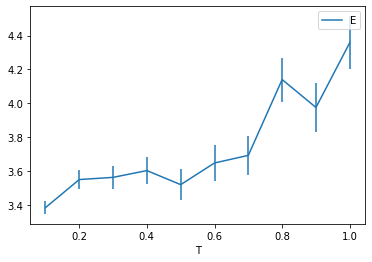

In [27]:
df_eq.plot(x="T", y="E", yerr="err")

In [30]:
el = "../improv_runs/bmn2_su2_g10/e0_linear_no16.csv"
df_el = pd.read_csv(el)
df_el

,T,E,err
0,0.1,3.280,0.021
1,0.2,3.462,0.030
2,0.3,3.487,0.039
3,0.4,3.552,0.045
4,0.5,3.543,0.050
5,0.6,3.631,0.059
6,0.7,3.705,0.065
7,0.8,4.010,0.072
8,0.9,4.025,0.080
9,1.0,4.287,0.087


<AxesSubplot:xlabel='T'>

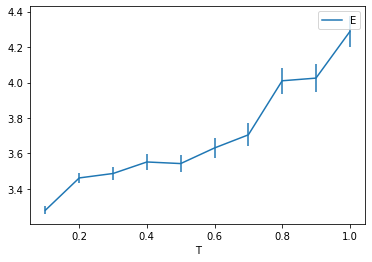

In [31]:
df_el.plot(x="T", y="E", yerr="err")

<AxesSubplot:xlabel='T'>

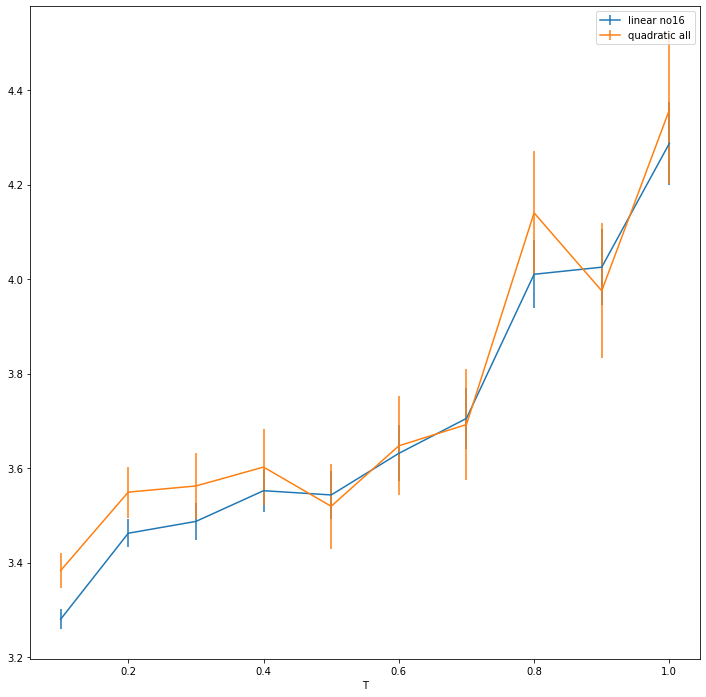

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
df_el.plot(x="T", y="E", yerr="err", label="linear no16", ax=ax)
df_eq.plot(x="T", y="E", yerr="err", label="quadratic all", ax=ax)